### Alignment

In [3]:
!cat scripts/salmon.sh . fastq

PDIR=$1
FASTQDIR=$2
quantsDir=$3
INDEX=$4
JOBS=$5

cd $PDIR
mkdir -p $quantsDir

for f in $FASTQDIR/*fastq.gz; do 
	samp=`basename ${f}`; 
	samp=${samp/.fastq.gz/}; 
	echo "Processing sample ${samp}"; 
	salmon quant -i $INDEX \
 	-l A -r $f -p $JOBS --validateMappings -o $quantsDir/$samp; 
done


In [18]:
%%bash
for index in `ls -d ~/tools/HERVs/files/*salmon_index/`; do
    echo `date`;
    name=`basename $index`; name=${name/.bed_salmon_index/};name=${name/package-entities-/};
    echo $name;
    mkdir -p herv/quant_${name};
    bash scripts/salmon.sh . fastq herv/quant_${name} $index 20;
    echo "Done!";
    echo "";
done

Sat Sep 2 22:34:06 PDT 2023
erv
Processing sample hl60_combination_1
Processing sample hl60_combination_2
Processing sample hl60_decitabine_1
Processing sample hl60_decitabine_2
Processing sample hl60_dmso_1
Processing sample hl60_dmso_2
Processing sample hl60_rg3039_1
Processing sample hl60_rg3039_2
Done!

Sat Sep 2 22:48:54 PDT 2023
line
Processing sample hl60_combination_1
Processing sample hl60_combination_2
Processing sample hl60_decitabine_1
Processing sample hl60_decitabine_2
Processing sample hl60_dmso_1
Processing sample hl60_dmso_2
Processing sample hl60_rg3039_1
Processing sample hl60_rg3039_2
Done!

Sat Sep 2 23:09:38 PDT 2023
rc
Processing sample hl60_combination_1
Processing sample hl60_combination_2
Processing sample hl60_decitabine_1
Processing sample hl60_decitabine_2
Processing sample hl60_dmso_1
Processing sample hl60_dmso_2
Processing sample hl60_rg3039_1
Processing sample hl60_rg3039_2
Done!

Sat Sep 2 23:14:45 PDT 2023
retroposon
Processing sample hl60_combination

Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
### salmon (mapping-based) v1.2.1
### [ program ] => salmon 
### [ command ] => quant 
### [ index ] => { /data_gilbert/home/aarab/tools/HERVs/files/package-entities-erv.bed_salmon_index/ }
### [ libType ] => { A }
### [ unmatedReads ] => { fastq/hl60_combination_1.fastq.gz }
### [ threads ] => { 20 }
### [ validateMappings ] => { }
### [ output ] => { herv/quant_erv/hl60_combination_1 }
Logs will be written to herv/quant_erv/hl60_combination_1/logs
[2023-09-02 22:34:07.549] [jointLog] [info] setting maxHashResizeThreads to 20
[2023-09-02 22:34:07.549] [jointLog] [info] Fragment incompatibility prior below threshold.  Incompatible fragments will be ignored.
[2023-09-02 22:34:07.549] [jointLog] [info] Usage of --validateMappings implies use of minScoreFraction. Since not explicitly specified, it is being set to 0.65
[2023-09-02 22:34:07.549] [joint

In [5]:
cat scripts/deseq_drug_combo_pipeline.R | head -n 8

args <- commandArgs(trailingOnly = TRUE)

PDIR <- args[1]
GTF <- args[2]
quantDir <- args[3]
outDir <- args[4]

setwd(PDIR)


In [1]:
import subprocess

In [2]:
def run_deseq_pipeline(GTF,quantDir,outDir):
    
    cm=f"Rscript scripts/deseq_drug_combo_pipeline.R '.' '{GTF}' '{quantDir}' '{outDir}'"
    print(cm)
    subprocess.run(f'mkdir -p {outDir}',shell=True)
    subprocess.run(cm,shell=True)    

### erv

In [4]:
run_deseq_pipeline(
    GTF = '~/tools/HERVs/files/package-entities-erv.gtf.gz',
    quantDir='herv/quant_erv/',
    outDir='herv/deseq_erv/'
)

Rscript scripts/deseq_drug_combo_pipeline.R '.' '~/tools/HERVs/files/package-entities-erv.gtf.gz' 'herv/quant_erv/' 'herv/deseq_erv/'


quant files:
herv/quant_erv//hl60_combination_1/quant.sf
herv/quant_erv//hl60_combination_2/quant.sf
herv/quant_erv//hl60_decitabine_1/quant.sf
herv/quant_erv//hl60_decitabine_2/quant.sf
herv/quant_erv//hl60_dmso_1/quant.sf
herv/quant_erv//hl60_dmso_2/quant.sf
herv/quant_erv//hl60_rg3039_1/quant.sf
herv/quant_erv//hl60_rg3039_2/quant.sf
reading in files with read_tsv
1 2 3 4 5 6 7 8 
using counts and average transcript lengths from tximport
using 'avgTxLength' from assays(dds), correcting for library size
using counts and average transcript lengths from tximport
estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates: 18 workers
mean-dispersion relationship
final dispersion estimates, fitting model and testing: 18 workers
condDMSOcondDecitabinecondrg3039condCombination
res_comb_vs_dmso




out of 96408 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 230, 0.24%
LFC < 0 (down)     : 242, 0.25%
outliers [1]       : 0, 0%
low counts [2]     : 66893, 69%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_decitabine_vs_dmso




out of 96408 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 26, 0.027%
LFC < 0 (down)     : 18, 0.019%
outliers [1]       : 0, 0%
low counts [2]     : 61319, 64%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_decitabine




out of 96408 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 95, 0.099%
LFC < 0 (down)     : 51, 0.053%
outliers [1]       : 0, 0%
low counts [2]     : 68287, 71%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_rg3039_vs_dmso




out of 96408 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 93, 0.096%
LFC < 0 (down)     : 47, 0.049%
outliers [1]       : 0, 0%
low counts [2]     : 66893, 69%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_rg3039




out of 96408 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 41, 0.043%
LFC < 0 (down)     : 29, 0.03%
outliers [1]       : 0, 0%
low counts [2]     : 66893, 69%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### line

In [23]:
run_deseq_pipeline(
    GTF = '~/tools/HERVs/files/package-entities-line.gtf.gz',
    quantDir='herv/quant_line/',
    outDir='herv/deseq_line/'
)

Rscript scripts/deseq_drug_combo_pipeline.R '.' '~/tools/HERVs/files/package-entities-line.gtf.gz' 'herv/quant_line/' 'herv/deseq_line/'


quant files:
herv/quant_line//hl60_combination_1/quant.sf
herv/quant_line//hl60_combination_2/quant.sf
herv/quant_line//hl60_decitabine_1/quant.sf
herv/quant_line//hl60_decitabine_2/quant.sf
herv/quant_line//hl60_dmso_1/quant.sf
herv/quant_line//hl60_dmso_2/quant.sf
herv/quant_line//hl60_rg3039_1/quant.sf
herv/quant_line//hl60_rg3039_2/quant.sf
reading in files with read_tsv
1 2 3 4 5 6 7 8 
using counts and average transcript lengths from tximport
using 'avgTxLength' from assays(dds), correcting for library size
using counts and average transcript lengths from tximport
estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates: 18 workers
mean-dispersion relationship
final dispersion estimates, fitting model and testing: 18 workers
condDMSOcondDecitabinecondrg3039condCombination
res_comb_vs_dmso




out of 242621 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 291, 0.12%
LFC < 0 (down)     : 391, 0.16%
outliers [1]       : 0, 0%
low counts [2]     : 184138, 76%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_decitabine_vs_dmso




out of 242621 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 39, 0.016%
LFC < 0 (down)     : 27, 0.011%
outliers [1]       : 0, 0%
low counts [2]     : 180380, 74%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_decitabine




out of 242621 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 91, 0.038%
LFC < 0 (down)     : 60, 0.025%
outliers [1]       : 0, 0%
low counts [2]     : 184138, 76%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_rg3039_vs_dmso




out of 242621 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 80, 0.033%
LFC < 0 (down)     : 43, 0.018%
outliers [1]       : 0, 0%
low counts [2]     : 184138, 76%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_rg3039




out of 242621 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 40, 0.016%
LFC < 0 (down)     : 24, 0.0099%
outliers [1]       : 0, 0%
low counts [2]     : 184138, 76%
(mean count < 6)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### rc

In [24]:
run_deseq_pipeline(
    GTF = '~/tools/HERVs/files/package-entities-rc.gtf.gz',
    quantDir='herv/quant_rc/',
    outDir='herv/deseq_rc/'
)

Rscript scripts/deseq_drug_combo_pipeline.R '.' '~/tools/HERVs/files/package-entities-rc.gtf.gz' 'herv/quant_rc/' 'herv/deseq_rc/'


quant files:
herv/quant_rc//hl60_combination_1/quant.sf
herv/quant_rc//hl60_combination_2/quant.sf
herv/quant_rc//hl60_decitabine_1/quant.sf
herv/quant_rc//hl60_decitabine_2/quant.sf
herv/quant_rc//hl60_dmso_1/quant.sf
herv/quant_rc//hl60_dmso_2/quant.sf
herv/quant_rc//hl60_rg3039_1/quant.sf
herv/quant_rc//hl60_rg3039_2/quant.sf
reading in files with read_tsv
1 2 3 4 5 6 7 8 
using counts and average transcript lengths from tximport
using 'avgTxLength' from assays(dds), correcting for library size
using counts and average transcript lengths from tximport
estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates: 18 workers
mean-dispersion relationship
final dispersion estimates, fitting model and testing: 18 workers
condDMSOcondDecitabinecondrg3039condCombination
res_comb_vs_dmso




out of 316 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 5, 1.6%
LFC < 0 (down)     : 7, 2.2%
outliers [1]       : 0, 0%
low counts [2]     : 97, 31%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_decitabine_vs_dmso




out of 316 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_decitabine




out of 316 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2, 0.63%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_rg3039_vs_dmso




out of 316 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2, 0.63%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_rg3039




out of 316 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### retroposon

In [25]:
run_deseq_pipeline(
    GTF = '~/tools/HERVs/files/package-entities-retroposon.gtf.gz',
    quantDir='herv/quant_retroposon/',
    outDir='herv/deseq_retroposon/'
)

Rscript scripts/deseq_drug_combo_pipeline.R '.' '~/tools/HERVs/files/package-entities-retroposon.gtf.gz' 'herv/quant_retroposon/' 'herv/deseq_retroposon/'


quant files:
herv/quant_retroposon//hl60_combination_1/quant.sf
herv/quant_retroposon//hl60_combination_2/quant.sf
herv/quant_retroposon//hl60_decitabine_1/quant.sf
herv/quant_retroposon//hl60_decitabine_2/quant.sf
herv/quant_retroposon//hl60_dmso_1/quant.sf
herv/quant_retroposon//hl60_dmso_2/quant.sf
herv/quant_retroposon//hl60_rg3039_1/quant.sf
herv/quant_retroposon//hl60_rg3039_2/quant.sf
reading in files with read_tsv
1 2 3 4 5 6 7 8 
using counts and average transcript lengths from tximport
using 'avgTxLength' from assays(dds), correcting for library size
using counts and average transcript lengths from tximport
estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates: 18 workers
mean-dispersion relationship
final dispersion estimates, fitting model and testing: 18 workers
condDMSOcondDecitabinecondrg3039condCombination
res_comb_vs_dmso




out of 15563 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 50, 0.32%
LFC < 0 (down)     : 63, 0.4%
outliers [1]       : 0, 0%
low counts [2]     : 9219, 59%
(mean count < 7)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_decitabine_vs_dmso




out of 15563 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 5, 0.032%
LFC < 0 (down)     : 7, 0.045%
outliers [1]       : 0, 0%
low counts [2]     : 9475, 61%
(mean count < 8)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_decitabine




out of 15563 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 14, 0.09%
LFC < 0 (down)     : 11, 0.071%
outliers [1]       : 0, 0%
low counts [2]     : 9731, 63%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_rg3039_vs_dmso




out of 15563 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 17, 0.11%
LFC < 0 (down)     : 14, 0.09%
outliers [1]       : 0, 0%
low counts [2]     : 11523, 74%
(mean count < 21)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_rg3039




out of 15563 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 8, 0.051%
LFC < 0 (down)     : 5, 0.032%
outliers [1]       : 0, 0%
low counts [2]     : 8706, 56%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### sine

In [26]:
run_deseq_pipeline(
    GTF = '~/tools/HERVs/files/package-entities-sine.gtf.gz',
    quantDir='herv/quant_sine/',
    outDir='herv/deseq_sine/'
)

Rscript scripts/deseq_drug_combo_pipeline.R '.' '~/tools/HERVs/files/package-entities-sine.gtf.gz' 'herv/quant_sine/' 'herv/deseq_sine/'


quant files:
herv/quant_sine//hl60_combination_1/quant.sf
herv/quant_sine//hl60_combination_2/quant.sf
herv/quant_sine//hl60_decitabine_1/quant.sf
herv/quant_sine//hl60_decitabine_2/quant.sf
herv/quant_sine//hl60_dmso_1/quant.sf
herv/quant_sine//hl60_dmso_2/quant.sf
herv/quant_sine//hl60_rg3039_1/quant.sf
herv/quant_sine//hl60_rg3039_2/quant.sf
reading in files with read_tsv
1 2 3 4 5 6 7 8 
using counts and average transcript lengths from tximport
using 'avgTxLength' from assays(dds), correcting for library size
using counts and average transcript lengths from tximport
estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates: 18 workers
mean-dispersion relationship
final dispersion estimates, fitting model and testing: 18 workers
condDMSOcondDecitabinecondrg3039condCombination
res_comb_vs_dmso




out of 493602 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 330, 0.067%
LFC < 0 (down)     : 247, 0.05%
outliers [1]       : 0, 0%
low counts [2]     : 408875, 83%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_decitabine_vs_dmso




out of 493602 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_decitabine




out of 493602 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 128, 0.026%
LFC < 0 (down)     : 35, 0.0071%
outliers [1]       : 0, 0%
low counts [2]     : 408875, 83%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_rg3039_vs_dmso




out of 493602 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 125, 0.025%
LFC < 0 (down)     : 62, 0.013%
outliers [1]       : 0, 0%
low counts [2]     : 408875, 83%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_rg3039




out of 493602 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 14, 0.0028%
LFC < 0 (down)     : 9, 0.0018%
outliers [1]       : 0, 0%
low counts [2]     : 408875, 83%
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### satellite

In [27]:
run_deseq_pipeline(
    GTF = '~/tools/HERVs/files/package-entities-satellite.gtf.gz',
    quantDir='herv/quant_satellite/',
    outDir='herv/deseq_satellite/'
)

Rscript scripts/deseq_drug_combo_pipeline.R '.' '~/tools/HERVs/files/package-entities-satellite.gtf.gz' 'herv/quant_satellite/' 'herv/deseq_satellite/'


quant files:
herv/quant_satellite//hl60_combination_1/quant.sf
herv/quant_satellite//hl60_combination_2/quant.sf
herv/quant_satellite//hl60_decitabine_1/quant.sf
herv/quant_satellite//hl60_decitabine_2/quant.sf
herv/quant_satellite//hl60_dmso_1/quant.sf
herv/quant_satellite//hl60_dmso_2/quant.sf
herv/quant_satellite//hl60_rg3039_1/quant.sf
herv/quant_satellite//hl60_rg3039_2/quant.sf
reading in files with read_tsv
1 2 3 4 5 6 7 8 
using counts and average transcript lengths from tximport
using 'avgTxLength' from assays(dds), correcting for library size
using counts and average transcript lengths from tximport
estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates: 18 workers
mean-dispersion relationship
final dispersion estimates, fitting model and testing: 18 workers
condDMSOcondDecitabinecondrg3039condCombination
res_comb_vs_dmso




out of 1316 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1, 0.076%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_decitabine_vs_dmso




out of 1316 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_decitabine




out of 1316 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1, 0.076%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_rg3039_vs_dmso




out of 1316 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1, 0.076%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results


out of 1316 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_rg3039



### snrna

In [29]:
run_deseq_pipeline(
    GTF = '~/tools/HERVs/files/package-entities-snrna.gtf.gz',
    quantDir='herv/quant_snrna/',
    outDir='herv/deseq_snrna/'
)

Rscript scripts/deseq_drug_combo_pipeline.R '.' '~/tools/HERVs/files/package-entities-snrna.gtf.gz' 'herv/quant_snrna/' 'herv/deseq_snrna/'


quant files:
herv/quant_snrna//hl60_combination_1/quant.sf
herv/quant_snrna//hl60_combination_2/quant.sf
herv/quant_snrna//hl60_decitabine_1/quant.sf
herv/quant_snrna//hl60_decitabine_2/quant.sf
herv/quant_snrna//hl60_dmso_1/quant.sf
herv/quant_snrna//hl60_dmso_2/quant.sf
herv/quant_snrna//hl60_rg3039_1/quant.sf
herv/quant_snrna//hl60_rg3039_2/quant.sf
reading in files with read_tsv
1 2 3 4 5 6 7 8 
using counts and average transcript lengths from tximport
using 'avgTxLength' from assays(dds), correcting for library size
using counts and average transcript lengths from tximport
estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates: 18 workers
mean-dispersion relationship
final dispersion estimates, fitting model and testing: 18 workers
condDMSOcondDecitabinecondrg3039condCombination
res_comb_vs_dmso




out of 645 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1, 0.16%
LFC < 0 (down)     : 2, 0.31%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_decitabine_vs_dmso




out of 645 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 1, 0.16%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_decitabine




out of 645 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_rg3039_vs_dmso




out of 645 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_rg3039




out of 645 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### scrna

In [30]:
run_deseq_pipeline(
    GTF = '~/tools/HERVs/files/package-entities-scrna.gtf.gz',
    quantDir='herv/quant_scrna/',
    outDir='herv/deseq_scrna/'
)

Rscript scripts/deseq_drug_combo_pipeline.R '.' '~/tools/HERVs/files/package-entities-scrna.gtf.gz' 'herv/quant_scrna/' 'herv/deseq_scrna/'


quant files:
herv/quant_scrna//hl60_combination_1/quant.sf
herv/quant_scrna//hl60_combination_2/quant.sf
herv/quant_scrna//hl60_decitabine_1/quant.sf
herv/quant_scrna//hl60_decitabine_2/quant.sf
herv/quant_scrna//hl60_dmso_1/quant.sf
herv/quant_scrna//hl60_dmso_2/quant.sf
herv/quant_scrna//hl60_rg3039_1/quant.sf
herv/quant_scrna//hl60_rg3039_2/quant.sf
reading in files with read_tsv
1 2 3 4 5 6 7 8 
using counts and average transcript lengths from tximport
using 'avgTxLength' from assays(dds), correcting for library size
using counts and average transcript lengths from tximport
estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates: 18 workers
mean-dispersion relationship
final dispersion estimates, fitting model and testing: 18 workers
condDMSOcondDecitabinecondrg3039condCombination
res_comb_vs_dmso




out of 248 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_decitabine_vs_dmso




out of 248 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 1, 0.4%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_decitabine




out of 248 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_rg3039_vs_dmso




out of 248 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_rg3039




out of 248 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### trna

In [31]:
run_deseq_pipeline(
    GTF = '~/tools/HERVs/files/package-entities-trna.gtf.gz',
    quantDir='herv/quant_trna/',
    outDir='herv/deseq_trna/'
)

Rscript scripts/deseq_drug_combo_pipeline.R '.' '~/tools/HERVs/files/package-entities-trna.gtf.gz' 'herv/quant_trna/' 'herv/deseq_trna/'


quant files:
herv/quant_trna//hl60_combination_1/quant.sf
herv/quant_trna//hl60_combination_2/quant.sf
herv/quant_trna//hl60_decitabine_1/quant.sf
herv/quant_trna//hl60_decitabine_2/quant.sf
herv/quant_trna//hl60_dmso_1/quant.sf
herv/quant_trna//hl60_dmso_2/quant.sf
herv/quant_trna//hl60_rg3039_1/quant.sf
herv/quant_trna//hl60_rg3039_2/quant.sf
reading in files with read_tsv
1 2 3 4 5 6 7 8 
using counts and average transcript lengths from tximport
using 'avgTxLength' from assays(dds), correcting for library size
using counts and average transcript lengths from tximport
estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates: 18 workers
mean-dispersion relationship
final dispersion estimates, fitting model and testing: 18 workers
condDMSOcondDecitabinecondrg3039condCombination
res_comb_vs_dmso




out of 246 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_decitabine_vs_dmso




out of 246 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results


out of 246 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_decitabine

res_rg3039_vs_dmso




out of 246 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



res_comb_vs_rg3039




out of 246 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 0, 0%
LFC < 0 (down)     : 0, 0%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



###

### complicated DESeq2!

In [335]:
# colData2 = colData

In [336]:
# # add dummy variables for drug treatment 
# colData2$Decitabine <- factor(c(
#     rep('Treated',4),rep('NotTreated',4)
# ),c('NotTreated','Treated'))

# colData2$rg3039     <- factor(c(
#     rep('Treated',2),rep('NotTreated',4),rep('Treated',2)
# ),c('NotTreated','Treated'))


# colData2

___

In [337]:
# model.matrix(~0+Decitabine+rg3039+Decitabine*rg3039,colData2)

In [338]:
# dds2 <- DESeqDataSetFromTximport(
#     txi, colData2, ~0+Decitabine+rg3039+Decitabine*rg3039
# )

# # Annova test
# dds2 <- DESeq(dds2, test="LRT", reduced=~1, parallel=TRUE)

In [339]:
# resultsNames(dds2)

In [340]:
# # contrast design: combination treatment vs dmso 
# res_comb_vs_dmso  = results(dds2, contrast=list(
#     c('DecitabineTreated','rg3039Treated','DecitabineTreated.rg3039Treated'),
#     c('DecitabineNotTreated')
# ),listValues=c(1,-1))

In [341]:
# res_comb_vs_dmso %>% summary

In [342]:
# # contrast design: decitabine treatment vs dmso 
# res_decitabine_vs_dmso  = results(dds2, contrast=list(
#     c('DecitabineTreated'),
#     c('DecitabineNotTreated')
# ),listValues=c(1,-1))

In [343]:
# res_decitabine_vs_dmso %>% summary

___

In [344]:
# model.matrix(~0+rg3039+Decitabine+Decitabine*rg3039,colData2)

In [345]:
# dds3 <- DESeqDataSetFromTximport(
#     txi, colData2, ~0+rg3039+Decitabine+Decitabine*rg3039
# )

# # Annova test
# dds3 <- DESeq(dds3, test="LRT", reduced=~1, parallel=TRUE)

In [346]:
# resultsNames(dds3)

In [347]:
# # contrast design: combination treatment vs decitabine
# res_comb_vs_decitabine  = results(dds3, contrast=list(
#     c('rg3039Treated','rg3039Treated.DecitabineTreated'),
#     c('rg3039NotTreated')
# ),listValues=c(1,-1))

In [348]:
# res_comb_vs_decitabine %>% summary

In [349]:
# # contrast design: rg3039 treatment vs dmso
# res_rg3039_vs_dmso  = results(dds3, contrast=list(
#     c('rg3039Treated'),
#     c('rg3039NotTreated')
# ),listValues=c(1,-1))

In [350]:
# res_rg3039_vs_dmso %>% summary

In [351]:
# # contrast design: combination treatment vs rg3039 
# res_comb_vs_rg3039  = results(dds3, contrast=list(
#     c('DecitabineTreated','rg3039Treated','rg3039Treated.DecitabineTreated'),
#     c('rg3039NotTreated')
# ),listValues=c(1,-1))

In [352]:
# res_comb_vs_rg3039 %>% summary

### simple DESeq2!

In [32]:
# dds_simple <- DESeqDataSetFromTximport(
#     txi, colData, ~0+cond
# )

# dds_simple <- DESeq(dds_simple, parallel=TRUE)

# resultsNames(dds_simple)

# # contrast design: combination treatment vs dmso 
# res_comb_vs_dmso  = results(dds_simple, contrast=list(c('condCombination'),c('condDMSO')),listValues=c(1,-1))

# res_comb_vs_dmso %>% summary

# # contrast design: decitabine treatment vs dmso 
# res_decitabine_vs_dmso  = results(dds_simple, contrast=list(c('condDecitabine'),c('condDMSO')),listValues=c(1,-1))

# res_decitabine_vs_dmso %>% summary

# # contrast design: combination treatment vs decitabine
# res_comb_vs_decitabine  = results(dds_simple, contrast=list(c('condCombination'),c('condDecitabine')),listValues=c(1,-1))

# res_comb_vs_decitabine %>% summary

# # contrast design: rg3039 treatment vs dmso
# res_rg3039_vs_dmso  = results(dds_simple, contrast=list(c('condrg3039'),c('condDMSO')),listValues=c(1,-1))

# res_rg3039_vs_dmso %>% summary

# # contrast design: combination treatment vs rg3039 
# res_comb_vs_rg3039  = results(dds_simple, contrast=list(c('condCombination'),c('condrg3039')),listValues=c(1,-1))

# res_comb_vs_rg3039 %>% summary

## Plots

In [1]:
suppressMessages(suppressWarnings(library (DESeq2)))
suppressMessages(suppressWarnings(library (tidyverse)))
suppressMessages(suppressWarnings(library (patchwork)))
suppressMessages(suppressWarnings(library (ggplot2)))
suppressMessages(suppressWarnings(library (ggrepel)))

In [2]:
source('../../scripts/util.R')

In [8]:
result_table = read.table(
    'herv/deseq_erv/result_table.txt'
) %>% data.frame

result_table <- result_table %>% rownames_to_column('name') %>% 
    mutate(rowname=name) %>%
    separate(name, into = c("name", "discard"), sep = "::") %>%
    separate(name, into = c("discard", "name"), sep = ":ERV:", ) %>%
    select(-discard) %>% column_to_rownames('rowname')

### scatter plot

In [18]:
plot_gene_counts <- function (dds, gene_id,gene_name){
    fiss <- plotCounts(dds, gene_id, intgroup = c("cond"), returnData = TRUE)

    p <- ggplot(fiss,
      aes(x = cond, y = count, color = cond)) + 
      geom_point(size=5,alpha=8/10) + stat_summary(fun=mean, geom="line") +
      scale_y_log10() + 
      theme_bw() + 
      ggtitle(gene_name)
    
    return (p + theme_Publication())
}

In [9]:
prep_scatter <- function(p){
    p + 
    geom_point(
        data          = result_table %>% dplyr::filter(name %in% labels$name),
        colour='#3cedf0',size = 2, alpha = 1, show.legend = FALSE) + 
    geom_point(
        data          = result_table[labels %>% rownames,],
        shape = 21, colour = "#386cb0", fill = "#3cedf0", size = 2, stroke = 1,
        alpha = 1, show.legend = FALSE) + 
    geom_text_repel(
        data          = result_table[labels %>% rownames,],
        nudge_y       = 1.1 ,#- subset(dat, mpg > 30)$mpg,
        segment.size  = .2,
        size = 4,
        segment.color = "grey50",
        direction     = "x"
    ) +
    theme_bw(30) +
    theme(
        text=element_text(size=14),
        panel.background = element_rect(colour = "black"), 
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.ticks = element_line(size = .5)
        
    ) -> p
    return (p)
}

In [133]:
labels = result_table %>%
    dplyr::filter(
        (comb_vs_dmso_log2FC > 6)
        &
        (abs(decitabine_vs_dmso_log2FC) < 0.8 & abs(rg3039_vs_dmso_log2FC) < 0.8)
        &
        grepl('^LTR67B',name)
        # &
        # (name %in% (result_table %>% 
        #      group_by(name) %>% tally() %>% filter(n<100) %>% 
        #      column_to_rownames('name') %>% rownames
        # ))
    )

labels %>% rownames

[1] "3095015:ERV:LTR67B::chr6:36350628-36351191"

In [134]:
result_table$label = ''

result_table[labels %>% rownames,]$label = labels %>% rownames

In [135]:
result_table %>% ggplot + 
    aes(decitabine_vs_dmso_log2FC, comb_vs_dmso_log2FC, label = label) + 
    # "#fdb462", "#7fc97f
    geom_point(colour='gray90',size = 2, alpha = 1, show.legend = FALSE) + 
    xlab('log2FC\nDecitabine vs DMSO') + 
    ylab('log2FC\nCombination vs DMSO') + 
    theme_Publication() + 
    labs(colour = "") -> p1 


In [136]:
result_table %>% ggplot + 
    aes(rg3039_vs_dmso_log2FC, comb_vs_dmso_log2FC, label = label) + 
    # "#fdb462", "#7fc97f
    geom_point(colour='gray90',size = 2, alpha = 1, show.legend = FALSE) + 
    xlab('log2FC\nRG3039 vs DMSO') + 
    ylab('log2FC\nCombination vs DMSO') +     
    theme_Publication() + 
    labs(colour = "") -> p2
    # scale_y_continuous(breaks=NULL) 

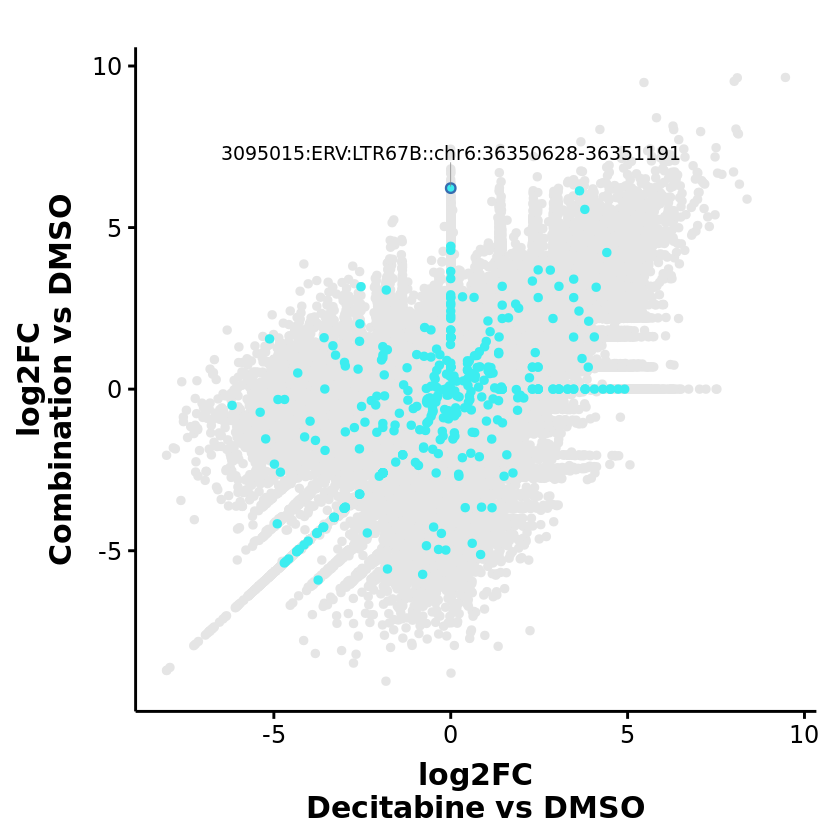

In [137]:
(prep_scatter(p1) + theme_Publication())
# & theme(plot.margin = unit(c(0.1,0.1,0.1,0.1), "cm"))

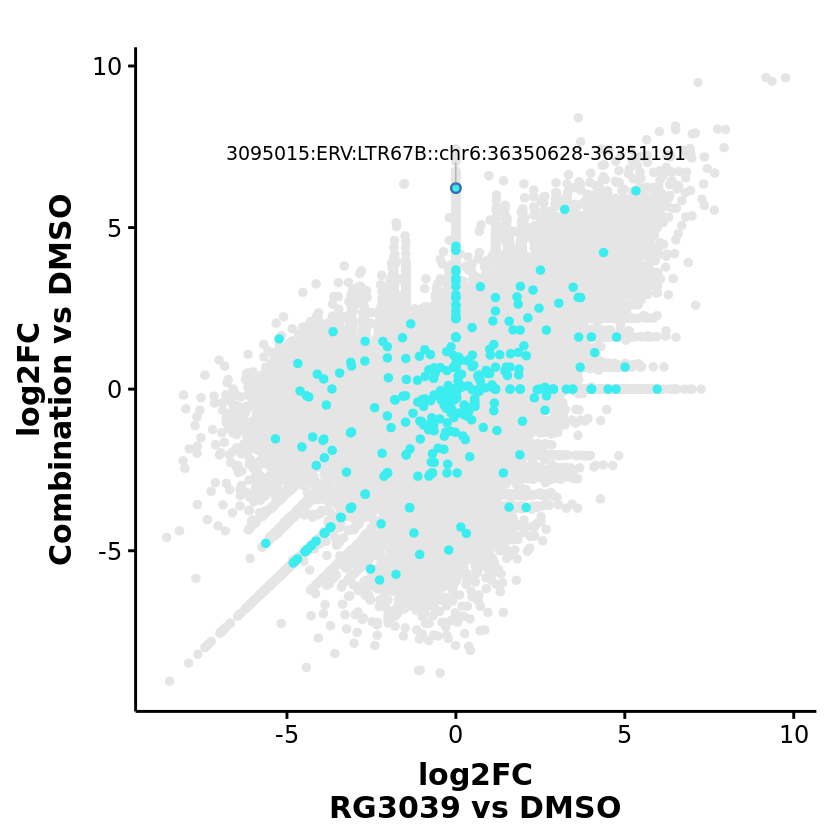

In [138]:
(prep_scatter(p2) + theme_Publication())

In [139]:
ggsave('herv/deseq_erv/expression-scatter.eps',
       plot=(
           prep_scatter(p1) + theme_Publication() + theme(axis.title = element_text(face = "plain", size = rel(0.8)))
       ) + (
           prep_scatter(p2) + theme_Publication() + theme(axis.title = element_text(face = "plain", size = rel(0.8)))
       ),       
       width = 10, height = 5, device='eps')

___


In [140]:
dds2 = readRDS('herv/deseq_erv/dds.rds')

In [141]:
plot_gene_counts(
    dds2,
    '3095015:ERV:LTR67B::chr6:36350628-36351191',
    '3095015:ERV:LTR67B\nchr6:36350628-36351191'
) + 
xlab('') + 
theme(
    legend.position = "none",
    axis.title = element_text(face = "plain", size=16),
    axis.text.x = element_text(angle = 45,hjust=1),
    text=element_text(size=12),
    plot.title = element_text(face = "plain", size=16),
    
) -> p3

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



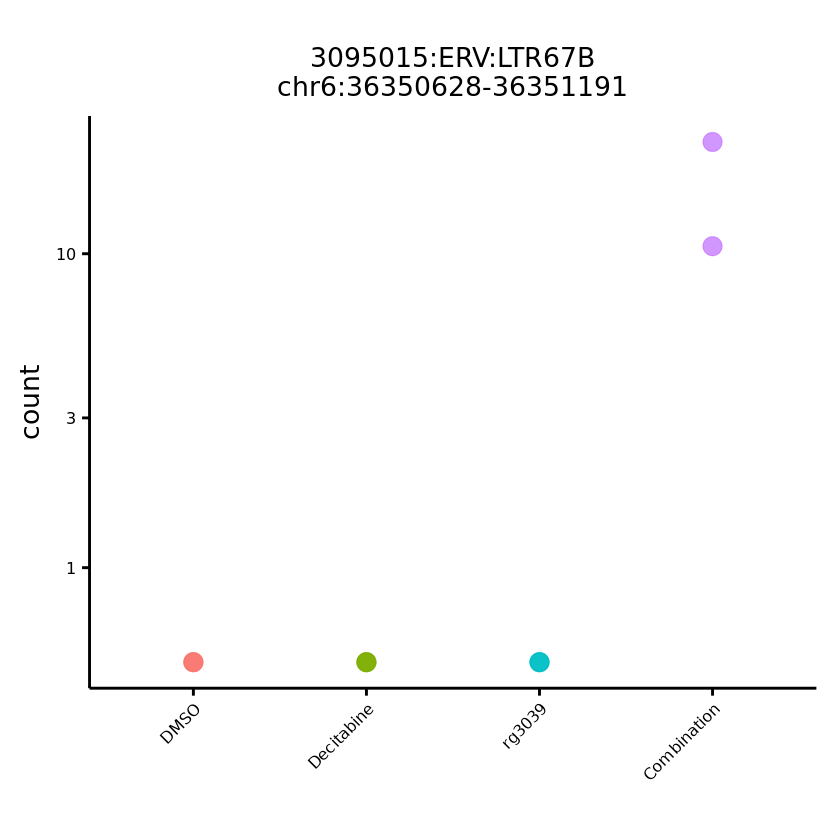

In [142]:
p3

In [143]:
ggsave('herv/deseq_erv/expression-counts.pdf',
       plot=p3,
       width = 4, height = 5)

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



### heatmap

In [ ]:
dim(ncu)[1] - sum(rowSums(ncu) == 0)

In [ ]:
heat_colors <- brewer.pal(n = 6, name = "RdYlBu") %>% rev
paired <- brewer.pal(n = 10, name = "Paired")


In [ ]:
ann_colors = list(
    cond = c('DMSO'= paired[1], 'Decitabine'=paired[3], 'rg3039'=paired[9],'Combination'=paired[10])
)

In [409]:
# ncu[
#     # select genes based on abs(log2FC) and pvalue
#     result_table %>%
#         dplyr::filter((abs(rep2_vs_rep1_log2FC) < 1 & rep2_vs_rep1_pvalue > 0.9) & (
#             (abs(comb_vs_dmso_log2FC) > 1 & co
#              mb_vs_dmso_pvalue  < 0.05) |
#             (abs(comb_vs_decitabine_log2FC) > 1 & comb_vs_decitabine_pvalue  < 0.05) |
#             (abs(comb_vs_rg3039_log2FC) > 1 & comb_vs_rg3039_pvalue  < 0.05) |
#             (abs(decitabine_vs_dmso_log2FC) > 1 & decitabine_vs_dmso_pvalue  < 0.05) |
#             (abs(rg3039_vs_dmso_log2FC) > 1 & rg3039_vs_dmso_pvalue  < 0.05)
#         )

#         #     (
#         #     (abs(comb_vs_decitabine_log2FC) > 1 & comb_vs_decitabine_pvalue  < 0.01) |
#         #     (abs(comb_vs_dmso_log2FC) > 1 & comb_vs_dmso_pvalue  < 0.01)
#         # ) & (abs(decitabine_vs_dmso_log2FC) < 0.8 & abs(rg3039_vs_dmso_log2FC) < 0.8)
            
#         ) %>% 
#     rownames
#     , 
#     # subset normalized counts
#     colData %>% arrange(cond) %>% rownames
# ] %>% 
# rownames_to_column('name') %>% 
#         dplyr::rowwise() %>% dplyr::mutate(name_new = strsplit(name, split=":")[[1]][2]) %>% 
#         data.frame %>%
#         filter(!duplicated(name_new)) %>%
#     column_to_rownames('name_new') %>% select(-name) -> ncu1

# ncu1 %>% dim

# ncu1 %>%
#     # generate heatmap
#     pheatmap(
#         color = heat_colors, 
#         show_colnames = F,
#         show_rownames = T,
#         cutree_rows = 5,
#         main = 'Decitabine+rg3039 drug combination\nendogenous retrovirus (ERV)',
#         annotation = colData %>% arrange(cond) %>% select(cond),
#         cluster_cols = F, 
#         scale = 'row',
#         angle_col= 45,
#         annotation_colors = ann_colors
# ) -> hm

# # https://stackoverflow.com/questions/43051525/how-to-draw-pheatmap-plot-to-screen-and-also-save-to-file
# pdf('herv/heatmap_clustering.pdf', width=7, height=50)
# grid::grid.newpage()
# grid::grid.draw(hm$gtable)
# dev.off()

In [ ]:
RES %>% names

In [ ]:
# data.frame(assay(rld))[
#     # select genes based on abs(log2FC) and pvalue
#     result_table %>%
#         dplyr::filter(
#             name %in% labels$name
#             # (abs(comb_vs_decitabine_log2FC) > 5 & comb_vs_decitabine_log2FC  < 0.01) 
#             # &
#             # (abs(decitabine_vs_dmso_log2FC) < 1 & abs(rg3039_vs_dmso_log2FC) < 1)
#             # &
#             # (name %in% (result_table %>% 
#             #      group_by(name) %>% tally() %>% filter(n<100) %>% 
#             #      column_to_rownames('name') %>% rownames
#             # ))

#             (abs(rep2_vs_rep1_log2FC) < 1 & rep2_vs_rep1_pvalue > 0.9) & (
#             (abs(comb_vs_dmso_log2FC) > 1 & comb_vs_dmso_pvalue  < 0.05) |
#             (abs(comb_vs_decitabine_log2FC) > 1 & comb_vs_decitabine_pvalue  < 0.05) |
#             (abs(comb_vs_rg3039_log2FC) > 1 & comb_vs_rg3039_pvalue  < 0.05) |
#             (abs(decitabine_vs_dmso_log2FC) > 1 & decitabine_vs_dmso_pvalue  < 0.05) |
#             (abs(rg3039_vs_dmso_log2FC) > 1 & rg3039_vs_dmso_pvalue  < 0.05)
#         )

#         #     (abs(comb_vs_decitabine_log2FC) > 1 & comb_vs_decitabine_pvalue  < 0.01) |
#         #     (abs(comb_vs_dmso_log2FC) > 1 & comb_vs_dmso_pvalue  < 0.01)
#         # ) & (abs(decitabine_vs_dmso_log2FC) < 0.8 & abs(rg3039_vs_dmso_log2FC) < 0.8)
#         ) %>% 
#     rownames
#     , 
#     # subset normalized counts
#     colData %>% arrange(cond) %>% rownames
# ] -> rld1
# # %>% 
# # rownames_to_column('name') %>% 
# #         dplyr::rowwise() %>% dplyr::mutate(name_new = strsplit(name, split=":")[[1]][2]) %>% 
# #         data.frame %>%
# #         filter(!duplicated(name_new)) %>%
# #     column_to_rownames('name_new') %>% 
# # select(-name) 

# rld1 %>%
#     # generate heatmap
#     pheatmap(
#         color = heat_colors, 
#         show_colnames = F,
#         show_rownames = T,
#         cutree_rows = 2,
#         main = 'Decitabine+rg3039 drug combination\nendogenous retrovirus (ERV)',
#         annotation = colData %>% arrange(cond) %>% select(cond),
#         cluster_cols = F, 
#         # scale = 'row',
#         angle_col= 45,
#         annotation_colors = ann_colors
# ) -> hm

# # # https://stackoverflow.com/questions/43051525/how-to-draw-pheatmap-plot-to-screen-and-also-save-to-file
# # pdf('DAC-rg3039/RNA-seq/herv/heatmap_clustering_counts.pdf', width=7, height=50)
# # grid::grid.newpage()
# # grid::grid.draw(hm$gtable)
# # dev.off()

### 

<!-- - ERVL-E 
    - https://herv.img.cas.cz/elements/72
    - https://dfam.org/family/DF0000120/summary -->

In [412]:
# ncu1 = ncu %>% rownames_to_column('name') %>% 
#         dplyr::rowwise() %>% dplyr::mutate(name_new = strsplit(name, split=":")[[1]][2]) %>% 
#         data.frame %>%
#         # filter(!duplicated(name_new)) %>%
#         filter(name_new == 'ERVL−E')

In [413]:
# ncu1 %>% 
#     # select(-name) %>% 
#     head

# Session Info

In [414]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /data_gilbert/home/aarab/anaconda3/envs/deseq2/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] ggthemes_4.2.4              scales_1.1.1               
 [3] RColorBrewer_1.1-2          pheatmap_1.0.12            
 [5] gridExtra_2.3               BiocParallel_1.28.0        
 [7] patchwork_1.1.1             DESeq2_1.34.0              
 [9] SummarizedExperim

In [415]:
date()

[1] "Tue Sep  5 12:06:49 2023"